<h2><center> Image Classification of Birds using the iNaturalist Dataset</center></h2>
<h3><center>Springboard | Capstone 2: In-Depth Analysis/Modeling: Model 2 </center></h3>
<h4><center>By: Lauren Broussard</center></h4>

----

In [1]:
from keras.models import Sequential,load_model #used to build model 
from keras.layers import Activation, Dense, Dropout, Flatten #Dense used to add layers to model
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD #this is for optimization on learning rate

Let's run another model using Convolutional Neural Networks (CNN).

Again, we'll run some of our setup operations from our PreProcessing Notebook. In it, we'll do a number of set up steps like create our train, test, and validation sets, set up the number of epochs to run, and augment the orientation of our training and validation images. 

We'll also decide how many images to use of our total dataset. 

In [2]:
print("Pre-Processing & Set Up")
%run ./2.0_PreProcessing_SetUp.ipynb

Pre-Processing & Set Up
Total Images To Use: 15000

Number of Training Images:  8400
Number of Validation Images:  3000
Number of Test Images:  3600 

img_dir =  ../data/raw/
img_width, img_height =  128 128
batch_size =  128
no_epochs =  50
no_classes =  2
patience =  10 


Augment Images - Training
Found 8400 validated image filenames belonging to 2 classes.
CPU times: user 113 ms, sys: 300 ms, total: 412 ms
Wall time: 1.31 s

Augment Images - Validation and Testing
Found 3000 validated image filenames belonging to 2 classes.
CPU times: user 31.1 ms, sys: 52 ms, total: 83.1 ms
Wall time: 293 ms


----

### MODEL 2.

#### Add Layers

In [3]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3))) #convolution layer
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #

model2.add(Conv2D(32, (3, 3))) #receives input from previous conv layer
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.6)) # what proportion to drop out
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

#### Compile

In [4]:
%%time
# compile, and add metrics==['accuracy'] to keep track of diagnostics for each epoch
model2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

CPU times: user 6.84 ms, sys: 966 µs, total: 7.8 ms
Wall time: 7.06 ms


#### Fit

In [5]:
%%time
model2_history = model2.fit(
    train_generator,
    steps_per_epoch= len(df_train) // batch_size,
    epochs=no_epochs,
    validation_data=valid_generator,
    validation_steps= len(df_val) // batch_size,
    callbacks = [early_stopping_monitor],
    verbose=2)

Epoch 1/50
65/65 - 149s - loss: 0.5875 - accuracy: 0.6983 - val_loss: 0.5621 - val_accuracy: 0.7018
Epoch 2/50
65/65 - 128s - loss: 0.5174 - accuracy: 0.7449 - val_loss: 0.7125 - val_accuracy: 0.6613
Epoch 3/50
65/65 - 130s - loss: 0.4906 - accuracy: 0.7690 - val_loss: 0.4957 - val_accuracy: 0.7541
Epoch 4/50
65/65 - 129s - loss: 0.4590 - accuracy: 0.7882 - val_loss: 0.5863 - val_accuracy: 0.6729
Epoch 5/50
65/65 - 129s - loss: 0.4504 - accuracy: 0.7944 - val_loss: 0.6082 - val_accuracy: 0.7069
Epoch 6/50
65/65 - 130s - loss: 0.4402 - accuracy: 0.7979 - val_loss: 0.4415 - val_accuracy: 0.7965
Epoch 7/50
65/65 - 130s - loss: 0.4202 - accuracy: 0.8057 - val_loss: 0.4492 - val_accuracy: 0.7840
Epoch 8/50
65/65 - 132s - loss: 0.4135 - accuracy: 0.8146 - val_loss: 0.4409 - val_accuracy: 0.7952
Epoch 9/50
65/65 - 133s - loss: 0.4050 - accuracy: 0.8169 - val_loss: 0.4035 - val_accuracy: 0.8210
Epoch 10/50
65/65 - 133s - loss: 0.4026 - accuracy: 0.8189 - val_loss: 0.4096 - val_accuracy: 0.8156

#### Training & Validation Summary

In [6]:
# show summary 
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9

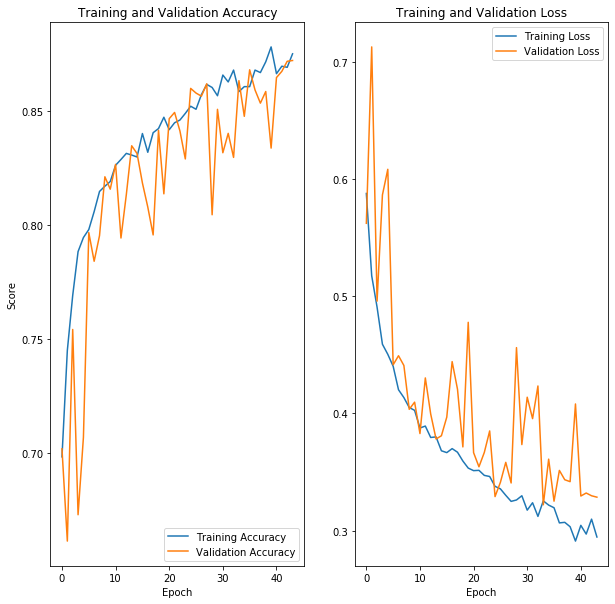

In [7]:
# plot 
plot_accuracy_and_loss(model2_history) #from preprocessing and setup notebook

In [8]:
# save weights

In [9]:
# save model
file_name = 'model2.h5'
model2.save('../models/{}'.format(file_name))

#### Predict

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
                    dataframe=df_test,
                    directory=img_dir,
                    x_col="file_name",
                    y_col="is_bird",
                    batch_size=1,
                    shuffle=False,
                    class_mode="binary",    
                    target_size=(img_height,img_width))

Found 3600 validated image filenames belonging to 2 classes.


### RESULTS & VISUALIZATIONS

In [11]:
%%time
test_generator.reset()

# make predictions on model2

y_pred = (model2.predict(test_generator) > 0.5).astype('int32')

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Not Bird', 'Bird']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[1647  183]
 [ 299 1471]]
Classification Report
              precision    recall  f1-score   support

    Not Bird       0.85      0.90      0.87      1830
        Bird       0.89      0.83      0.86      1770

    accuracy                           0.87      3600
   macro avg       0.87      0.87      0.87      3600
weighted avg       0.87      0.87      0.87      3600

CPU times: user 55.3 s, sys: 3.42 s, total: 58.8 s
Wall time: 33.3 s


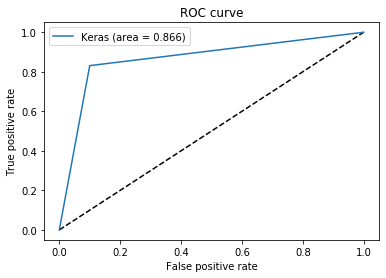

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

_ = plt.plot([0, 1], [0, 1], 'k--')
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

_ = plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

----

In [13]:
%load_ext watermark
%watermark -a "Lab 2.0" -d -t -v -p numpy,pandas,tensorflow,keras

Lab 2.0 2020-09-27 11:17:19 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
tensorflow 2.3.0
keras 2.4.3
